<a href="https://colab.research.google.com/github/nikhilcss97/Keras_practise/blob/master/imdb_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(7)

In [0]:
class Imdb:
  
  def __init__(self, top_words, max_review_length, embedding_dims):
    self.top_words= top_words
    self.max_review_length= max_review_length
    self.embedding_dims= embedding_dims
    
  def load_data(self):
    """
    Load the data from the aws instance
    """
    
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= self.top_words)
    return (x_train, y_train), (x_test, y_test)
  
  def padding(self, x_train, x_test):
    """
    Clip and pad the reviews to a certain length. Shorter reviews will be padded with 0s
    """
    
    x_train= sequence.pad_sequences(x_train, maxlen= self.max_review_length)
    x_test= sequence.pad_sequences(x_test, maxlen= self.max_review_length)
    return (x_train, x_test)
      
  def model(self):
    """
    Builds the model
    """
    model= Sequential()
    model.add(Embedding(self.top_words, self.embedding_dims, input_length= self.max_review_length))
    model.add(LSTM(50))
    model.add(Dense(1, activation= 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    
  def train_model(self, model):
    """
    Training the model
    
    Returns: trained model
    """
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=1000)
    return model
   
  def test_model(self, model):
    """
    Test the trained model on the test data
    """
    scores = model.evaluate(x_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))    

In [0]:
obj= Imdb(5000, 500, 100)
(x_train, y_train), (x_test, y_test)= obj.load_data()
(x_train, x_test)= obj.padding(x_train, x_test)

In [23]:
model= obj.model()
model= obj.train_model(model)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 43s 2ms/step - loss: 0.6887 - acc: 0.6268 - val_loss: 0.6416 - val_acc: 0.6726
Epoch 2/3
25000/25000 [==============================] - 42s 2ms/step - loss: 0.6281 - acc: 0.6897 - val_loss: 0.6100 - val_acc: 0.7085
Epoch 3/3
25000/25000 [==============================] - 42s 2ms/step - loss: 0.5546 - acc: 0.7574 - val_loss: 0.5118 - val_acc: 0.7565


In [25]:
obj.test_model(model)

Accuracy: 75.65%


___

EDA

In [0]:
length_vector= []
for i in range(len(x_train)):
  length_vector.append(len(x_train[i]))

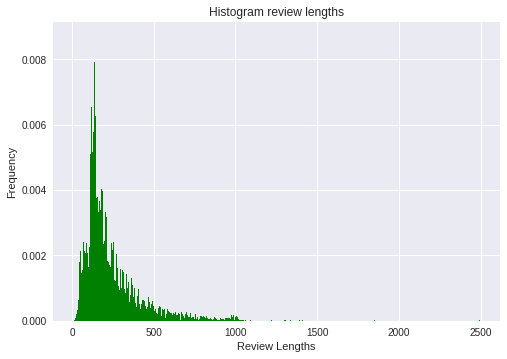

In [0]:
n, bins, patches = plt.hist(length_vector, bins= 1000, density=True, facecolor='g')

plt.xlabel('Review Lengths')
plt.ylabel('Frequency')
plt.title('Histogram review lengths')
plt.grid(True)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


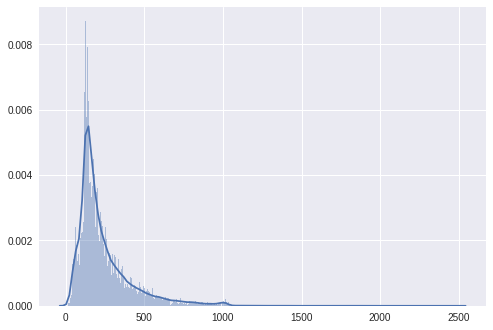

In [0]:
sns.distplot(length_vector, bins= 1000)

___

___